In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import matlib
from thresholding import*
import random
import re

In [2]:
df_sim = pd.read_csv(r'C:\Users\Invitado\Documents\Python\DS_MASTER\City_Adam_Intern\df_sim_img.csv')
df_sim['ids'] = list(zip(df_sim.ListingId_1, df_sim.ListingId_2))
df_full = pd.read_csv(r'C:\Users\Invitado\Documents\Python\DS_MASTER\City_Adam_Intern\merged_clean_df.csv')
df_full.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
def compare(df,id_1,id_2):
    #Compare URLS
    print(df['listing_url'][df['ListingId']==id_1])
    #print(df[df['ListingId']==id_1].values)
    print(df['listing_url'][df['ListingId']==id_2])
    #print(df[df['ListingId']==id_2].values)
    return 
compare(df_full,41709087,41339519)

15339    https://www.airbnb.nl/rooms/41709087
Name: listing_url, dtype: object
15209    https://www.airbnb.nl/rooms/41339519
Name: listing_url, dtype: object


In [5]:
sorted_dataset = scoring_unsupervised(df_sim)

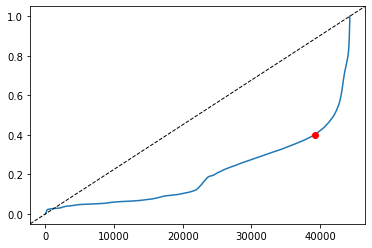

Knee of the curve is at index = 39221
Knee value = 0.4011926095121956


In [6]:
threshold,index = elbow_threshold(sorted_dataset) 

In [7]:
matches_score_weight, nonmatches_score_weight = unsupervised_labels(sorted_dataset,threshold)

In [8]:
columns = ['ids','agg_score','weights','uns_label']
uns_labels = matches_score_weight+nonmatches_score_weight
df_uns = pd.DataFrame(uns_labels,columns=columns)
df_uns 

,ids,agg_score,weights,uns_label
0,"(9903960, 21989969)",0.401193,0.000000,1.0
1,"(6264293, 35396160)",0.401218,0.000042,1.0
2,"(17428515, 1162769)",0.401262,0.000117,1.0
3,"(39904405, 1113862)",0.401271,0.000131,1.0
4,"(42289164, 29953708)",0.401320,0.000212,1.0
...,...,...,...,...
44332,"(6942100, 6675077)",0.401126,0.000166,0.0
44333,"(7357862, 26271194)",0.401148,0.000111,0.0
44334,"(33539827, 15984970)",0.401153,0.000098,0.0
44335,"(53505795, 47371801)",0.401162,0.000076,0.0


In [23]:
df_uns_label= df_sim.merge(df_uns,on='ids')
df_uns_label.to_csv('df_uns_label_img_1.csv',index=False)

In [24]:
df_uns_label

,ListingId_1,ListingId_2,Name_jaro_winker,Name_levenshtein_sim,Name_jaccard_sim,Name_relaxed_jaccard_sim,Name_overlap_sim,Name_containment_sim,Bedrooms_binary,Bedrooms_numerical,...,Star_rating_binary,Star_rating_numerical,Xl_picture_url_img,LaBSE_emb_LaBSE_cos,Descrp_tfidf_tf_idf_cos,Lat_Lng_geo,ids,agg_score,weights,uns_label
0,10043980,10025641,0.976471,0.941176,0.714286,0.714286,0.0,0.833333,1.0,1.0,...,1.0,1.00000,0.999709,0.936309,0.988256,0.972364,"(10043980, 10025641)",0.897852,0.829414,1.0
1,10044256,10025641,0.988235,0.970588,0.714286,0.714286,0.0,0.833333,1.0,1.0,...,1.0,1.00000,0.998886,0.999702,0.998728,0.956031,"(10044256, 10025641)",0.911078,0.851502,1.0
2,10044256,10043980,0.976471,0.941176,0.714286,0.714286,0.0,0.833333,1.0,1.0,...,1.0,1.00000,0.998843,0.936287,0.989496,0.972462,"(10044256, 10043980)",0.883966,0.806225,1.0
3,10145992,10025641,0.988235,0.970588,0.714286,0.714286,0.0,0.833333,1.0,1.0,...,1.0,1.00000,0.989987,0.845712,0.964040,0.930090,"(10145992, 10025641)",0.849651,0.748919,1.0
4,10145992,10044256,0.988235,0.970588,0.714286,0.714286,0.0,0.833333,1.0,1.0,...,1.0,1.00000,0.990425,0.847703,0.962973,0.932911,"(10145992, 10044256)",0.862754,0.770801,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44332,5315586,20757123,0.427575,0.333333,0.000000,0.166667,0.0,0.000000,0.0,0.0,...,-1.0,-1.00000,0.995385,0.797381,-1.000000,0.984002,"(5315586, 20757123)",0.238787,0.404807,0.0
44333,5315586,27795712,0.662645,0.333333,0.000000,0.125000,0.0,0.000000,0.0,0.0,...,0.0,0.69697,0.997954,0.777321,-1.000000,0.982979,"(5315586, 27795712)",0.285751,0.287747,0.0
44334,50452179,50451988,0.915705,0.769231,0.500000,0.500000,0.0,0.666667,1.0,1.0,...,0.0,0.69697,1.000000,0.976764,-1.000000,0.991118,"(50452179, 50451988)",0.706566,0.509970,1.0
44335,25853345,25433802,0.657520,0.204545,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,-1.0,-1.00000,0.996721,0.932478,0.158012,0.943027,"(25853345, 25433802)",0.695347,0.491234,1.0


In [21]:
df_uns_label[df_uns_label['weights']==1]


,ListingId_1,ListingId_2,Name_jaro_winker,Name_levenshtein_sim,Name_jaccard_sim,Name_relaxed_jaccard_sim,Name_overlap_sim,Name_containment_sim,Bedrooms_binary,Bedrooms_numerical,...,Star_rating_binary,Star_rating_numerical,Xl_picture_url_img,LaBSE_emb_LaBSE_cos,Descrp_tfidf_tf_idf_cos,Lat_Lng_geo,ids,agg_score,weights,uns_label
14839,41709087,41339519,0.972718,0.923077,0.714286,0.714286,0.0,0.833333,1.0,1.0,...,-1.0,-1.0,0.998786,0.977399,0.047775,1.000000,"(41709087, 41339519)",1.0,1.0,1.0
24447,19468890,53505795,0.450216,0.102041,0.000000,0.000000,0.0,0.000000,-1.0,-1.0,...,-1.0,-1.0,0.997837,-1.000000,-1.000000,0.930344,"(19468890, 53505795)",0.0,1.0,0.0
